(Defining latex commands: not to be shown...)
$$
\newcommand{\norm}[1]{\left \| #1 \right \|}
\DeclareMathOperator{\minimize}{minimize}
\newcommand{\real}{\mathbb{R}}
\newcommand{\normal}{\mathcal{N}}
$$

#Intelligent Systems Sheet 3
Maximus Mutschler & Jan-Peter Hohloch

#  Gaussian Algebra (25 Points)

Prove that the product of two univariate (scalar) Gaussian distributions is a Gaussian again, i.e. show, by explicitly performing the required arithmetic transformations, that

\begin{equation}
   \normal(x;\mu,\sigma^2)\normal(x;m,s^2) = \normal\left[x; \left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\left(\frac \mu{\sigma^2}+\frac m{s^2}\right),\left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\right]\normal\left[\mu;m,\sigma^2+s^2\right].
\end{equation}

## Proof
\begin{align*}
   f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}}\cdot \frac{1}{\sqrt{2\pi s^2}}\cdot e^{\frac{-(x-m)^2}{2s^2}}\\
   &=\frac{1}{2\pi s\sigma}\cdot e^{-\alpha}\\
   \text{where }\alpha &= \frac{s^2(x-\mu)^2+\sigma^2(x-m)^2}{2\sigma^2 s^2}\\
   &=\frac{(s^2+\sigma^2)x^2-2(s^2\mu+\sigma^2 m)x+s^2\mu^2+\sigma^2m^2}{2\sigma^2s^2}\\
   &=\frac{x^2-2\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}x+\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2-\left(\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2+\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}+\underbrace{\frac{\frac{s^2\mu^2+\sigma^2m^2}{s^2+\sigma^2}-\left(\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}}_\beta\\
   \beta&= \frac{\frac{s^4\mu^2+s^2\sigma^2\mu^2+s^2\sigma^2m^2+\sigma^4m^2-\left(s^4\mu^2+2s^2\sigma^2\mu m+\sigma^4m^2\right)}{\left(s^2+\sigma^2\right)^2}}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}\\
   &=\frac{s^2\sigma^2\left(\mu^2-2\mu m+m^2\right)}{2\sigma^2s^2\left(s^2+\sigma^2\right)}\\
   &=\frac{(\mu-m)^2}{2(s^2+\sigma^2)}\\
   \Rightarrow f(x)&=\frac{1}{2\pi s\sigma}\cdot e^{-(\alpha-\beta)-\beta}\\
   &=\frac{1}{2\pi s\sigma}\cdot e^{-\frac{\left(x-\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2}\right)^2}{\frac{2\sigma^2s^2}{s^2+\sigma^2}}}\cdot e^{-\frac{(\mu-m)^2}{2(s^2+\sigma^2)}}\\
   &=\frac{\sqrt{2\pi(s^2+\sigma^2)}\sqrt{2\pi\frac{\sigma^2s^2}{s^2+\sigma^2}}}{2\pi s\sigma}\normal\left[x;\frac{s^2\mu+\sigma^2 m}{s^2+\sigma^2},\frac{\sigma^2s^2}{s^2+\sigma^2}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\\
   &=\frac{\sqrt{2\pi\cdot 2\pi\sigma^2s^2}}{2\pi s\sigma}\normal\left[x; \left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\left(\frac \mu{\sigma^2}+\frac m{s^2}\right),\left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\\
   &=\normal\left[x; \left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\left(\frac \mu{\sigma^2}+\frac m{s^2}\right),\left(\frac 1{\sigma^2}+\frac 1{s^2}\right)^{-1}\right]\normal\left[\mu;m,\sigma^2+s^2\right]\hspace{2cm} q.e.d.
\end{align*}

#  Maximum Likelihood Estimator of Simple Linear Regression (25 Points)

Derive the formula $\mathbf{w}_{MLE} = (X^TX)^{-1}X^T\mathbf{y}$ from the lecture, by calculating the derivative of $p(\mathbf{y}\,|X,\mathbf{w}) = \normal(\mathbf{y}\,|X\mathbf{w}, \sigma^2I)$ with respect to $\mathbf{w}$, setting it to zero and solving it for $\mathbf{w}$.


Note: _To refresh your linear algebra you might find it useful to have a look in [here](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/pdfs/Murray_cribsheet.pdf)._

##wtf?

$\vec{w}=X^{-1}\vec{y}$, zumindest wenn ich das ausrechne...

#  Linear regression (50 Points)

In this exercise you will perform a regression analysis on a toy dataset. You will implement ridge regression and learn how to find a good model through a comparative performance analysis.

1) Download the [training set](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/data/ex1_train.csv)! <br>
2) Implement $\mathbf{w}_{RIDGE}$ as a function of a given $X, \mathbf{y}$ array and a regularization parameter $\lambda$!

In [1]:
# Loading the required packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [82]:
def wRidge(X,y,lamb):
    # Change the following line and implement the ridge regression estimator wRidge
    a = (lamb*np.eye(X.shape[0])+X.dot(X.T))
    b=np.linalg.inv(a)
    c=b.T.dot(X)
    return c.T.dot(y) # TODO pbyl wrong like this

3) Load "ex1_train.csv" into a numpy array! The first column in the csv file is $X$ and the second column is $\mathbf{y}$, assign them to each variable!

In [73]:
# Read ex1_train.csv and assign the first column and 
# second column to variables x and y respectively.
from numpy import genfromtxt
a=np.genfromtxt('ex1_train.csv',delimiter=' ')
x=a[:,0].T
y=a[:,1].T

4) Plot the training data with appropriate labels on each axes!

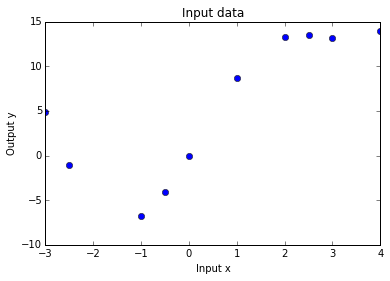

In [74]:
# Plot the input data here
plt.plot(x,y,'o')
plt.title('Input data')
plt.ylabel('Output y')
plt.xlabel('Input x')

5) Implement a function which constructs features upto a input polynomial degree $d$!<br>
Note: _Constructing higher polynomial features is similar to what you implemented in Exercise 3 (SVM) of the previous exercise sheet._

In [80]:
def construct_poly(x,d):
    ## Implement a method which given an array of size N, 
    ## returns an array of dimension (N,d)
    return (np.ones((d,1))*np.asmatrix(x)).T

In [86]:
#try it out
X=construct_poly(x,2)
print(X)
print(X.T.dot(X))
wRidge(X,y,1)

[[-3.  -3. ]
 [-2.5 -2.5]
 [-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 1.   1. ]
 [ 2.   2. ]
 [ 2.5  2.5]
 [ 3.   3. ]
 [ 4.   4. ]]
[[ 52.75  52.75]
 [ 52.75  52.75]]


matrix([[ 1.51220623,  1.51220623]])

6) Implement the Mean Squared Error Loss (MSE) as a function of the predicted and true values of the target variable! <br>

In [6]:
def MSE(y_predict,y_true):
    ## Implement mean squared error for a given input y and its predictions.
    return ((y_predict-y_true)**2)/y_predict.shape[0]

7) By comparing the MSE find the degree $d$ for the polynomial that fits the training data best! You might find it useful to use the code below to interactively change the variable $d$, set $\lambda = 1$ and keep it fixed. Plot the error as a function of different values of $d$!<br>

[-3.  -2.5 -1.  -0.5  0.   1.   2.   2.5  3.   4. ]
(10, 1) (10,)
[[   7.24825764  -79.61751096 -163.32510817 -124.420806    -64.36110538
    64.00498155  130.78610485  134.65832608  128.64828886  140.65345344]
 [   2.38125049  -75.48579685 -150.52183853 -115.64776572  -61.80985436
    53.25835177  113.12139072  116.59247535  111.20503839  121.96654702]
 [ -12.21977095  -63.09065449 -112.11202963  -89.32864491  -54.15610128
    21.01846246   60.12724836   62.39492317   58.87528698   65.90582776]
 [ -17.0867781   -58.95894038  -99.30875999  -80.55560464  -51.60485026
    10.27183269   42.46253424   44.32907244   41.4320365    47.21892134]
 [ -21.95378525  -54.82722626  -86.50549036  -71.78256437  -49.05359924
    -0.47479708   24.79782012   26.26322172   23.98878603   28.53201492]
 [ -31.68779954  -46.56379802  -60.89895109  -54.23648382  -43.95109719
   -21.96805662  -10.53160812   -9.86847974  -10.89771491   -8.84179791]
 [ -41.42181383  -38.30036979  -35.29241182  -36.69040328  -38.8

TypeError: only length-1 arrays can be converted to Python scalars

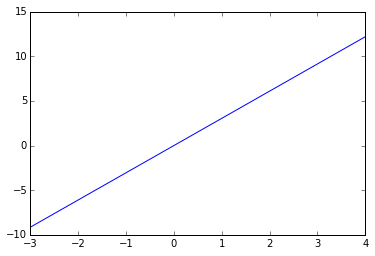

In [95]:
##This function provides an interactive mode to change polynomial degree. 
@interact(n=[1,16])
def plot(n):
    X = construct_poly(x,n)
    w = wRidge(X,y,1.0)
    plt.plot(x,X.dot(w.T))
    print(x)
    print(X.dot(w.T).shape, y.shape)
    print(MSE(X.dot(w.T),y))
    plt.title("MSE %f" % MSE(X.dot(w.T),y))
    plt.plot(x,y)

8) Apply models with different values of $d$ after being trained on the training dataset, to the test data available [here](http://webdav.tuebingen.mpg.de/lectures/ei-SS2015/data/ex1_test.csv). Compare the errors on the test data to the ones from the training by plotting the error curves as functions of the polynomial degree in a single plot! What do you conclude? <br>

In [82]:
A.T.dot(A)

array([[  1.00000000e+02,   1.00000000e+01,   1.00000000e+00],
       [  1.00000000e+01,   1.00000000e+00,   1.00000000e-01],
       [  1.00000000e+00,   1.00000000e-01,   1.00000000e-02]])

In [3]:
import scipy
from scipy import linalg
import numpy as np

In [25]:
A = np.array([[10,1,0.1],[10,1,0.2],[10,1.1,0.7]])
a = np.array([[10,1,0.1]])
A = a.T.dot(a)

B,rank = linalg.pinv(A,return_rank=True)
print rank
print B
print np.allclose(A,A.dot(B.dot(A)))

1
[[  9.80101960e-03   9.80101960e-04   9.80101960e-05]
 [  9.80101960e-04   9.80101960e-05   9.80101960e-06]
 [  9.80101960e-05   9.80101960e-06   9.80101960e-07]]
True


In [67]:
## Read test data here

9) With a fixed optimal $d$, change the value of $\lambda$ to one of the following values $[0.1, 1.0, 10.0]$ and find the minimum MSE!<br>

Hand in printed copy of completed notebook.